In [117]:
import csv
import numpy as np
from hmmlearn.hmm import GaussianHMM
import matplotlib.pyplot as plt

In [118]:
ls = []
with open('./aapl.csv') as csvfile:
    rdr = csv.reader(csvfile)
    for row in rdr:
        ls.append(row)
data = np.array(ls)
data = data[1:,1:]
data = data.astype(float)

In [119]:
_open = data[:,0:1]
_high = data[:,1:2]
_low = data[:,2:3]
_close = data[:,3:4]

frac_change = (_close - _open) / _open
frac_high = (_high - _open) / _open
frac_low = (_open - _low) / _open

In [120]:
X = np.column_stack([frac_change, frac_high, frac_low])

trainSet = X[0:1200]
testSet = X[1200:1761]

In [121]:
model = None
model = GaussianHMM (n_components = 4, covariance_type = 'diag', n_iter = 150)
model.fit(trainSet)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The functon distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\deprecati

GaussianHMM(algorithm='viterbi', covariance_type='diag', covars_prior=0.01,
      covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
      min_covar=0.001, n_components=4, n_iter=150, params='stmc',
      random_state=None, startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
      verbose=False)

In [122]:
test_range = 10
possible_frac_ch = np.linspace(min(testSet[0:test_range,0]), max(testSet[0:test_range,0]), 10)
possible_frac_hi = np.linspace(min(testSet[0:test_range,1]), max(testSet[0:test_range,1]), 10)
possible_frac_lo = np.linspace(min(testSet[0:test_range,2]), max(testSet[0:test_range,2]), 10)

In [123]:
def list_of_vals(testing_set, init, window):
    ls = []
    i = init
    while(i < init+window):
        ls.append(testing_set[i])
        i = i+1
    return ls

In [124]:
max_vals = []
d = 10
for i in range(0,test_range):
    init = i
    max_score = -1000
    map_val = -1000
    for ch in possible_frac_ch:
        for hi in possible_frac_hi:
            for lo in possible_frac_lo:
                ls = []
                ls = list_of_vals(testSet,init,d)
                ls.append([np.array(ch), np.array(hi), np.array(lo)])
                seq = np.array(ls)
                sc = model.score(seq)
                #print seq.shape
                #print sc
                if(sc > max_score):
                    max_score = sc
                    map_val = [np.array(ch), np.array(hi), np.array(lo)]
                    #print model.predict(seq)
    max_vals.append(map_val)
map_vals = np.array(max_vals)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Fu

In [125]:
print("Predicted :")
print(map_vals)

print("\nActual :")
print(testSet[0:test_range])

Predicted :
[[ 0.01001109  0.0120842   0.00411978]
 [-0.00599494  0.00658908  0.01052592]
 [-0.00599494  0.00658908  0.01052592]
 [ 0.01001109  0.0120842   0.00411978]
 [ 0.01001109  0.0120842   0.00411978]
 [ 0.01001109  0.0120842   0.00411978]
 [ 0.01001109  0.0120842   0.00411978]
 [ 0.01001109  0.0120842   0.00411978]
 [ 0.01001109  0.0120842   0.00411978]
 [ 0.01001109  0.0120842   0.00411978]]

Actual :
[[ 0.00498691  0.01072186  0.02306446]
 [-0.01438937  0.00614931  0.01525028]
 [-0.00518322  0.00132594  0.01591128]
 [ 0.01758701  0.01906285  0.00455049]
 [ 0.00232957  0.0053948   0.00980873]
 [-0.00409125  0.00223159  0.01090999]
 [-0.0183542   0.00109396  0.02540416]
 [ 0.02348066  0.02749874  0.00765947]
 [-0.02200098  0.00762045  0.02974435]
 [ 0.05002619  0.05055003  0.00091671]]


In [126]:
%matplotlib inline

In [127]:
pred_list = []
for i in range(test_range):
    close = _open[len(trainSet)+i] * (1 + map_vals[i,0])
    pred_list.append(close)

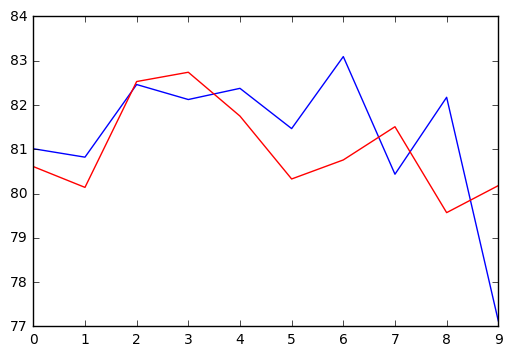

In [128]:
plt.plot(pred_list, label="prediction")
plt.plot(_close[1200:1200+test_range], label="actual", color="red")